#### 1. Import necessary libraries & dataset

In [1]:
# To work with dataframes
import pandas as pd 

# To perform numerical operations
import numpy as np

# To visualize data
import seaborn as sns

# To partition the data
from sklearn.model_selection import train_test_split

# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier

# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data_income = pd.read_csv("income.csv")
data = data_income.copy()

#### 2. To know the data

In [3]:
#to check variables' data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [4]:
#Check for missing values
data.isnull()
print('Data columns with null values:\n', data.isnull().sum())

Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [5]:
#Summary of numerical variables
summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [6]:
#Summary of categorical variables
summary_cate = data.describe(include = "O")
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [7]:
#Frequency of each categories
data['JobType'].value_counts()
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [8]:
#Checking for unique classes
print(np.unique(data['JobType'])) 
print(np.unique(data['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [9]:
#Since there exists ' ?' instesd of nan
#Read the data by including "na_values[' ?']" to consider ' ?' as nan !!!
data = pd.read_csv(r"C:\Users\HP\Desktop\NPTEL\Python for Data Science\income.csv",na_values=[" ?"]) 

#### 3. Data pre-processing

In [10]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [11]:
missing = data[data.isnull().any(axis=1)]
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [12]:
data2 = data.dropna(axis=0)
data3 = data2.copy()
data4 = data3.copy()
print(data2)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [13]:
# Realtionship between independent variables
correlation = data2.corr()
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_7108\1071012147.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data2.corr()


#### 4. Cross tables & Data Visualization

In [14]:
#Extracting the column names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [15]:
# Gender proportion table:
gender = pd.crosstab(index = data2["gender"], columns  = 'count', normalize = True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [16]:
#  Gender vs Salary Status:
gender_salstat = pd.crosstab(index = data2["gender"],columns = data2['SalStat'], margins = True, normalize =  'index') 
                 # Include row and column totals
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


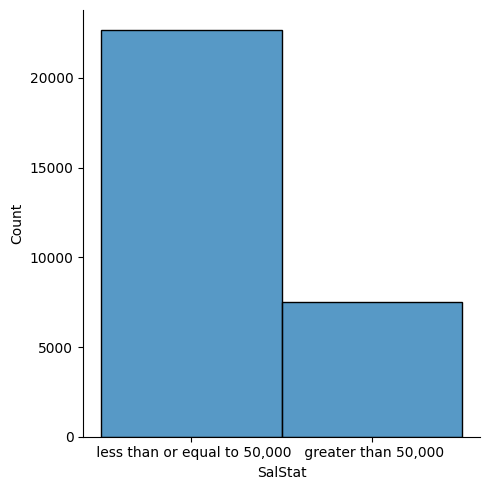

In [17]:
# Frequency distribution of 'Salary status' 
SalStat = sns.displot(data2['SalStat'])

75 % of people's salary status is <=50,000
25% of people's salary status is > 50,000

<AxesSubplot: xlabel='age', ylabel='Count'>

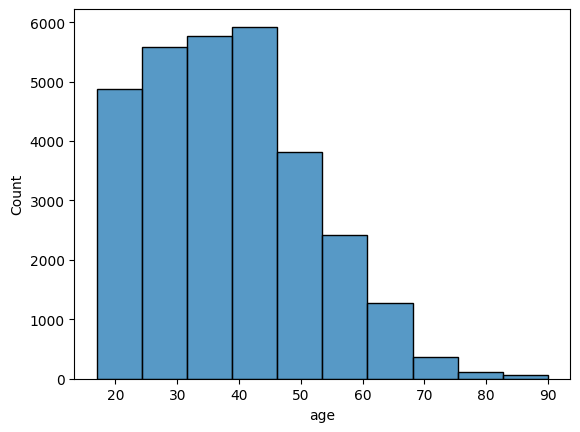

In [18]:
# Histogram of Age
sns.histplot(data2['age'], bins=10, kde=False)

People with age 20-45 age are high in frequency

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

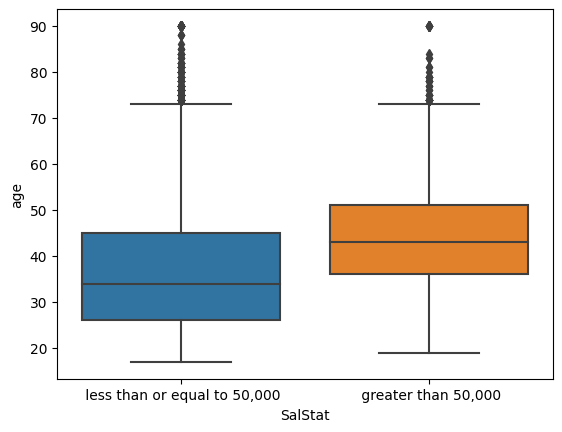

In [19]:
# Box Plot - Age vs Salary status
sns.boxplot(data=data2, x='SalStat', y='age')
data2.groupby('SalStat')['age'].median()

People with 35-50 age are more likely to earn > 50000 USD p.a
People with 25-35 age are more likely to earn <= 50000 USD p.a

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


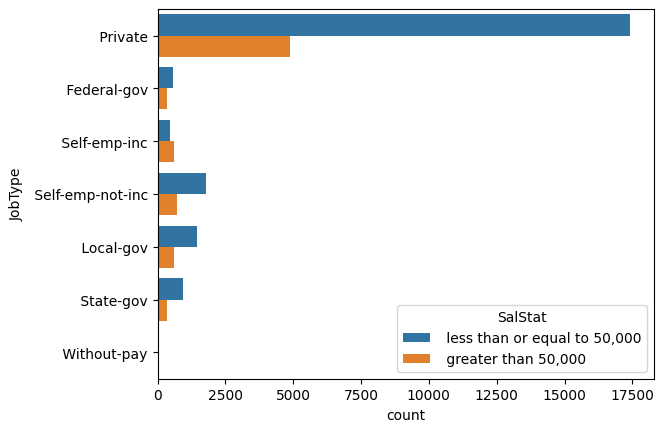

In [20]:
# Jobtype vs Salary Status
JobType     = sns.countplot(y=data2['JobType'],hue = 'SalStat', data=data2)
job_salstat =pd.crosstab(index = data2["JobType"],columns = data2['SalStat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


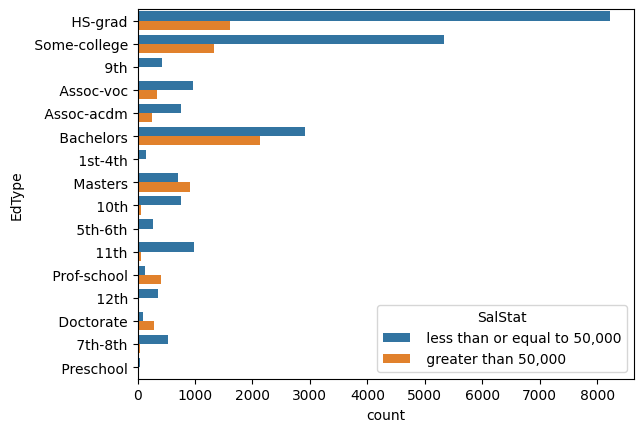

In [21]:
# Education vs Salary Status
Education   = sns.countplot(y=data2['EdType'],hue = 'SalStat', data=data2)
EdType_salstat = pd.crosstab(index = data2["EdType"], columns = data2['SalStat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


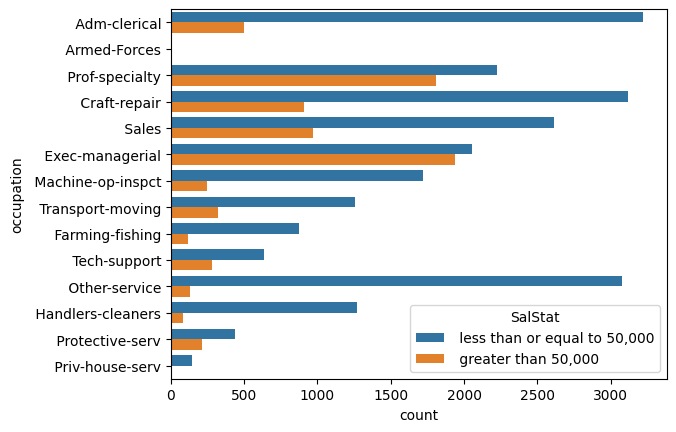

In [22]:
# Occupation vs Salary Status
Occupation  = sns.countplot(y=data2['occupation'],hue = 'SalStat', data=data2)
occ_salstat = pd.crosstab(index = data2["occupation"], columns =data2['SalStat'],margins = True,normalize = 'index')  
round(occ_salstat*100,1)

<AxesSubplot: xlabel='capitalgain', ylabel='Count'>

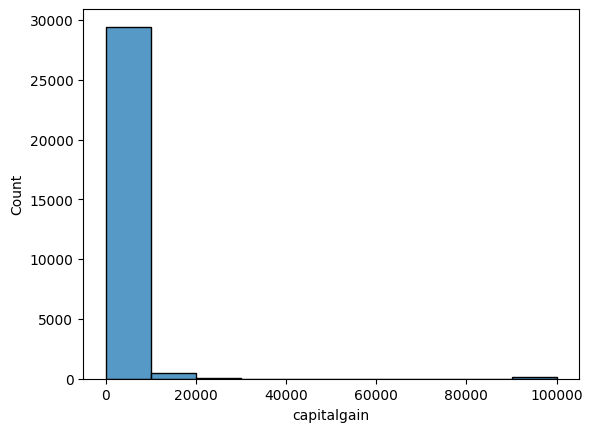

In [23]:
# Capital gain vs Salary Status
sns.histplot(data2['capitalgain'], bins = 10, kde = False)

<AxesSubplot: xlabel='capitalloss', ylabel='Count'>

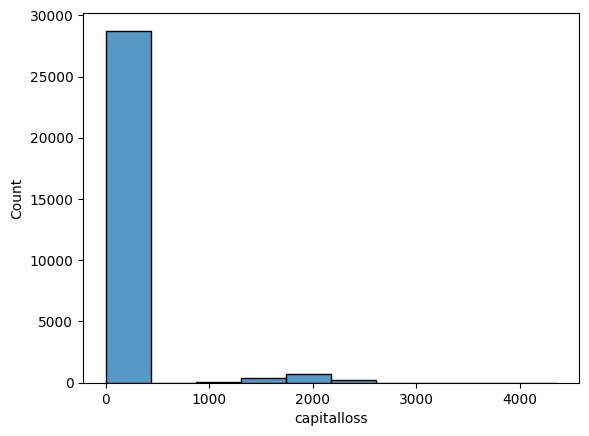

In [24]:
sns.histplot(data2['capitalloss'], bins = 10, kde = False)

## Logistic Regression

In [25]:
# Reindexing the salary status names to 0,1
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0, ' greater than 50,000':1})
print(data2["SalStat"])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_7108\2885488892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0, ' greater than 50,000':1})


In [26]:
new_data=pd.get_dummies(data2, drop_first=True)

In [27]:
# Storing the column names 
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [28]:
# Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
print(features)

['occupation_ Protective-serv', 'relationship_ Unmarried', 'nativecountry_ Poland', 'nativecountry_ Scotland', 'EdType_ Masters', 'nativecountry_ Columbia', 'EdType_ Prof-school', 'EdType_ Preschool', 'gender_ Male', 'JobType_ Without-pay', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'nativecountry_ South', 'EdType_ 1st-4th', 'EdType_ Some-college', 'occupation_ Craft-repair', 'JobType_ Self-emp-not-inc', 'nativecountry_ France', 'occupation_ Tech-support', 'maritalstatus_ Married-spouse-absent', 'race_ Black', 'EdType_ 9th', 'occupation_ Other-service', 'EdType_ 11th', 'nativecountry_ Cuba', 'EdType_ 7th-8th', 'occupation_ Machine-op-inspct', 'relationship_ Wife', 'occupation_ Priv-house-serv', 'nativecountry_ Thailand', 'maritalstatus_ Never-married', 'nativecountry_ Ireland', 'maritalstatus_ Widowed', 'nativecountry_ Iran', 'nativecountry_ Japan', 'nativecountry_ Guatemala', 'EdType_ Doctorate', 'nativecountry_ Germany', 'nativecountry_ Portugal', 'occupation_ Handlers-cleaners', '

In [29]:
# Storing the output values in y
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [30]:
# Storing the values from input features
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

In [32]:
# Make an instance of the Model
logistic = LogisticRegression()

In [33]:
# Fitting the values for x and y
logistic.fit(train_x,train_y)
logistic.coef_
logistic.intercept_

D:\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-1.04021966])

In [34]:
# Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [35]:
# Confusion matrix
conf_matrix = confusion_matrix(test_y, prediction)
print(conf_matrix)

[[6293  530]
 [ 952 1274]]


In [36]:
# Calculating the accuracy
accuracy_score1=accuracy_score(test_y, prediction)
print(accuracy_score1)

0.8362249972372637


In [37]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1482


### Logistic Regression - Removing insignificant variables

In [38]:
# Reindexing the salary status names to 0,1
data3['SalStat']=data3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [39]:
cols = ['gender','nativecountry','race','JobType']
new_data = data3.drop(cols,axis = 1)

In [40]:
new_data=pd.get_dummies(new_data, drop_first=True)
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,45,0,0,28,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,27,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20,0,0,35,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31974,34,0,0,40,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
31975,23,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31976,42,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
# Storing the column names 
columns_list2=list(new_data.columns)
print(columns_list2)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [42]:
# Separating the input names from data
features2=list(set(columns_list2)-set(['SalStat']))
print(features2)

['occupation_ Protective-serv', 'relationship_ Unmarried', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Separated', 'occupation_ Sales', 'capitalloss', 'EdType_ Masters', 'maritalstatus_ Married-AF-spouse', 'EdType_ Prof-school', 'EdType_ Preschool', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ Some-college', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Tech-support', 'EdType_ Bachelors', 'age', 'maritalstatus_ Married-spouse-absent', 'EdType_ 9th', 'occupation_ Other-service', 'EdType_ Assoc-voc', 'EdType_ 11th', 'occupation_ Farming-fishing', 'capitalgain', 'EdType_ HS-grad', 'occupation_ Transport-moving', 'EdType_ 7th-8th', 'occupation_ Armed-Forces', 'occupation_ Machine-op-inspct', 'relationship_ Other-relative', 'occupation_ Priv-house-serv', 'relationship_ Wife', 'maritalstatus_ Never-married', 'maritalstatus_ Widowed', 'relationship_ Own-child', 'EdType_ Doctorate', 'EdType_ 12th', 'occupation_ Handlers-cleaners', 'occupation_ Prof-specialt

In [43]:
# Storing the output values in y
y2=new_data['SalStat'].values
print(y2)

[0 0 1 ... 0 0 0]


In [44]:
# Storing the values from input features
x2 = new_data[features2].values
print(x2)

[[ 0  0  0 ...  1 28  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  1 ...  0 40  0]
 ...
 [ 0  0  1 ...  0 40  0]
 [ 0  0  1 ...  0 40  0]
 [ 0  0  0 ...  1 40  0]]


In [45]:
# Splitting the data into train and test
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2,test_size=0.3, random_state=0)

In [46]:
# Make an instance of the Model
logistic2 = LogisticRegression()

In [47]:
# Fitting the values for x and y
logistic2.fit(train_x2,train_y2)

D:\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Prediction from test data
prediction2 = logistic2.predict(test_x2)
print(prediction2)

[0 0 0 ... 0 0 0]


In [49]:
# Confusion matrix
conf_matrix2 = confusion_matrix(test_y2, prediction2)
print(conf_matrix2)

[[6310  513]
 [ 985 1241]]


In [50]:
# Calculating the accuracy
accuracy_score2 = accuracy_score(test_y2, prediction2)
print(accuracy_score2)

0.8344568460603382


In [51]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y2 != prediction2).sum())

Misclassified samples: 1498


## K - Nearest Neighbors (KNN)

In [52]:
# Reindexing the salary status names to 0,1
data4['SalStat']=data4['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data4['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [53]:
new_data=pd.get_dummies(data4, drop_first=True)
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
# Storing the column names 
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [55]:
# Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
print(features)

['occupation_ Protective-serv', 'relationship_ Unmarried', 'nativecountry_ Poland', 'nativecountry_ Scotland', 'EdType_ Masters', 'nativecountry_ Columbia', 'EdType_ Prof-school', 'EdType_ Preschool', 'gender_ Male', 'JobType_ Without-pay', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'nativecountry_ South', 'EdType_ 1st-4th', 'EdType_ Some-college', 'occupation_ Craft-repair', 'JobType_ Self-emp-not-inc', 'nativecountry_ France', 'occupation_ Tech-support', 'maritalstatus_ Married-spouse-absent', 'race_ Black', 'EdType_ 9th', 'occupation_ Other-service', 'EdType_ 11th', 'nativecountry_ Cuba', 'EdType_ 7th-8th', 'occupation_ Machine-op-inspct', 'relationship_ Wife', 'occupation_ Priv-house-serv', 'nativecountry_ Thailand', 'maritalstatus_ Never-married', 'nativecountry_ Ireland', 'maritalstatus_ Widowed', 'nativecountry_ Iran', 'nativecountry_ Japan', 'nativecountry_ Guatemala', 'EdType_ Doctorate', 'nativecountry_ Germany', 'nativecountry_ Portugal', 'occupation_ Handlers-cleaners', '

In [56]:
# Storing the output values in y
y3=new_data['SalStat'].values
print(y3)

[0 0 1 ... 0 0 0]


In [57]:
# Storing the values from input features
x3 = new_data[features].values
print(x3)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [58]:
# Splitting the data into train and test
train_x3,test_x3,train_y3,test_y3 = train_test_split(x3,y3,test_size=0.3, random_state=0)

In [59]:
# Storing the K nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)  

In [60]:
# Fitting the values for X and Y
KNN_classifier.fit(train_x3, train_y3)

KNeighborsClassifier()

In [61]:
# Predicting the test values with model
prediction = KNN_classifier.predict(test_x3)

In [62]:
# Performance metric check
conf_matrix3 = confusion_matrix(test_y3, prediction)
print(conf_matrix3)

[[6173  650]
 [ 843 1383]]


In [63]:
# Calculating the accuracy
accuracy_score3=accuracy_score(test_y3, prediction)
print(accuracy_score3)

0.8350093933031274


In [64]:
print('Misclassified samples: %d' % (test_y3 != prediction).sum())

Misclassified samples: 1493


### Effect of K value on classifier


In [65]:
Misclassified_sample = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x3, train_y3)
    pred_i = knn.predict(test_x3)
    Misclassified_sample.append((test_y3 != pred_i).sum())
print(Misclassified_sample)

[1766, 1516, 1515, 1436, 1493, 1438, 1451, 1432, 1458, 1436, 1441, 1447, 1451, 1423, 1413, 1390, 1424, 1396, 1434]


# Final Results

In [66]:
print("\n Accuracy of Logistic Regression classifier = ",accuracy_score1)
print("\n Accuracy of Logistic Regression classifier (After Removing Insignificant Variables) = ",accuracy_score2)
print("\n Accuracy of KNN classifier = ",accuracy_score3)


 Accuracy of Logistic Regression classifier =  0.8362249972372637

 Accuracy of Logistic Regression classifier (After Removing Insignificant Variables) =  0.8344568460603382

 Accuracy of KNN classifier =  0.8350093933031274


In [67]:
print("Maximum accuracy = ", max(accuracy_score1, accuracy_score2, accuracy_score3))

Maximum accuracy =  0.8362249972372637


It can be seen that the accuracy of the Logistic Regression classifier is slightly higher than the accuracy of the KNN classifier, but KNN classifier is more accurate than Logistic Regression classifier after removing insignificant variables.